In [18]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

sns.set_theme(context="talk", style="whitegrid", palette="colorblind")

# Analysis of stats

General statistics of our dataset.

In [19]:
stats = pd.read_csv(
    "data/shome2023notebook/stats.csv",
    header=None,
    names=["notebook", "num_cells"]
).reset_index(drop=True)
stats = stats.loc[stats["num_cells"] > 0].reset_index(drop=True)

def assign_complexity(value, p25, p75):
    """Assign complexity based on percentile thresholds of `num_cells`"""
    if value <= p25:
        return "small"
    elif value <= p75:
        return "medium"
    else:
        return "large"

# Calculate percentiles
p25 = stats['num_cells'].quantile(0.25)
p75 = stats['num_cells'].quantile(0.75)

# Create new bin column
stats['complexity'] = stats['num_cells'].apply(lambda x: assign_complexity(x, p25, p75))
stats

,notebook,num_cells,complexity
0,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium
1,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium
2,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium
3,data/assert_notebooks/JunchuanYu/Deep-learning...,8,small
4,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium
...,...,...,...
195175,data/quaranta2021kgtorrent/KT_dataset/lbroncha...,18,medium
195176,data/quaranta2021kgtorrent/KT_dataset/naomilin...,8,small
195177,data/quaranta2021kgtorrent/KT_dataset/octavios...,18,medium
195178,data/quaranta2021kgtorrent/KT_dataset/valcoder...,22,medium


In [20]:
asserts = pd.read_csv(
    "data/shome2023notebook/asserts.csv",
    header=None,
    names=["notebook", "assert"]
)
asserts

,notebook,assert
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_loss < 0.5, train_loss"
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_acc <= 1 and train_acc > 0.7, tra..."
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert test_acc <= 1 and test_acc > 0.7, test_acc"
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_loss < 0.5, train_loss"
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_acc <= 1 and train_acc > 0.7, tra..."
...,...,...
6,data/quaranta2021kgtorrent/KT_dataset/ashishpa...,assert shape[2] == 3
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert type(self.targetName) == str
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert type(self.colnames) == str
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert self.colnames in X.columns


In [21]:
prints = pd.read_csv(
    "data/shome2023notebook/prints.csv",
    header=None,
    names=["notebook", "print"]
)
prints

,notebook,print
15,data/assert_notebooks/JunchuanYu/Deep-learning...,"print('Epoch: ', epoch, '| Step: ', step, '|lo..."
15,data/assert_notebooks/JunchuanYu/Deep-learning...,"print(' |val_loss:', train_loss.item(), 'val_..."
15,data/assert_notebooks/JunchuanYu/Deep-learning...,print('save successfully!')
15,data/assert_notebooks/JunchuanYu/Deep-learning...,print('save successfully!')
13,data/assert_notebooks/JunchuanYu/Deep-learning...,"print('Epoch: ', epoch, '| Step: ', step, '|lo..."
...,...,...
12,data/quaranta2021kgtorrent/KT_dataset/beamers_...,"print('MAE:', score)"
4,data/quaranta2021kgtorrent/KT_dataset/kerneler...,"print(os.path.join(dirname, filename))"
7,data/quaranta2021kgtorrent/KT_dataset/kerneler...,print(f'No correlation plots shown: The number...
11,data/quaranta2021kgtorrent/KT_dataset/kerneler...,print(f'There are {nRow} rows and {nCol} colum...


In [22]:
lasts = pd.read_csv(
    "data/shome2023notebook/lasts.csv",
    header=None,
    names=["notebook", "last"]
)
lasts

,notebook,last
6,data/assert_notebooks/rohitashwachaks/MIS-382N...,"(X.sum(0, keepdim=True), X.sum(1, keepdim=True))"
10,data/assert_notebooks/rohitashwachaks/MIS-382N...,"(X_prob, X_prob.sum(1))"
14,data/assert_notebooks/rohitashwachaks/MIS-382N...,"y_hat[[0, 1], y]"
16,data/assert_notebooks/rohitashwachaks/MIS-382N...,"cross_entropy(y_hat, y)"
20,data/assert_notebooks/rohitashwachaks/MIS-382N...,"accuracy(y_hat, y) / len(y)"
...,...,...
10,data/quaranta2021kgtorrent/KT_dataset/talk2ran...,data.head()
11,data/quaranta2021kgtorrent/KT_dataset/talk2ran...,data.head()
12,data/quaranta2021kgtorrent/KT_dataset/talk2ran...,data.describe()
19,data/quaranta2021kgtorrent/KT_dataset/talk2ran...,"classifier.fit(X_train, y_train)"


In [23]:
stats.loc[:, ["num_cells", "complexity"]].describe(include="all")

,num_cells,complexity
count,195180.000000,195180
unique,NaN,3
top,NaN,medium
freq,NaN,94081
mean,21.213224,NaN
std,21.950015,NaN
min,1.000000,NaN
25%,8.000000,NaN
50%,15.000000,NaN
75%,26.000000,NaN


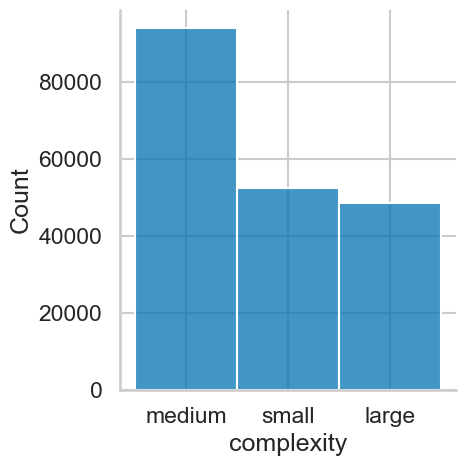

In [24]:
sns.displot(
    data=stats,
    x="complexity",
)

## Distribution of feedback mechanisms across complexity of notebooks

I expect that last statements have an even distribution, but it would be interesting if say prints are more common small and medium notebooks while asserts are more common in large notebooks.

In [25]:
notebook_asserts = asserts.groupby('notebook').size().reset_index(name='num_asserts')
stats = stats.merge(notebook_asserts, on='notebook', how='left')
stats['num_asserts'] = stats['num_asserts'].fillna(0)

notebook_prints = prints.groupby('notebook').size().reset_index(name='num_prints')
stats = stats.merge(notebook_prints, on='notebook', how='left')
stats['num_prints'] = stats['num_prints'].fillna(0)

notebook_lasts = lasts.groupby('notebook').size().reset_index(name='num_lasts')
stats = stats.merge(notebook_lasts, on='notebook', how='left')
stats['num_lasts'] = stats['num_lasts'].fillna(0)

stats

,notebook,num_cells,complexity,num_asserts,num_prints,num_lasts
0,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium,3.0,0.0,6.0
1,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium,3.0,0.0,6.0
2,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium,4.0,4.0,0.0
3,data/assert_notebooks/JunchuanYu/Deep-learning...,8,small,4.0,5.0,0.0
4,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium,4.0,4.0,0.0
...,...,...,...,...,...,...
195175,data/quaranta2021kgtorrent/KT_dataset/lbroncha...,18,medium,0.0,0.0,1.0
195176,data/quaranta2021kgtorrent/KT_dataset/naomilin...,8,small,0.0,1.0,6.0
195177,data/quaranta2021kgtorrent/KT_dataset/octavios...,18,medium,0.0,2.0,0.0
195178,data/quaranta2021kgtorrent/KT_dataset/valcoder...,22,medium,0.0,5.0,0.0


In [32]:
melted = stats.melt(
    id_vars=["notebook", "complexity"],
    value_vars=["num_asserts", "num_prints", "num_lasts"]
)
melted

,notebook,num_cells,complexity,variable,value
0,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium,num_asserts,3.0
1,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium,num_asserts,3.0
2,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium,num_asserts,4.0
3,data/assert_notebooks/JunchuanYu/Deep-learning...,8,small,num_asserts,4.0
4,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium,num_asserts,4.0
...,...,...,...,...,...
585535,data/quaranta2021kgtorrent/KT_dataset/lbroncha...,18,medium,num_lasts,1.0
585536,data/quaranta2021kgtorrent/KT_dataset/naomilin...,8,small,num_lasts,6.0
585537,data/quaranta2021kgtorrent/KT_dataset/octavios...,18,medium,num_lasts,0.0
585538,data/quaranta2021kgtorrent/KT_dataset/valcoder...,22,medium,num_lasts,0.0


/Users/aru/phd/shome2023notebook/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


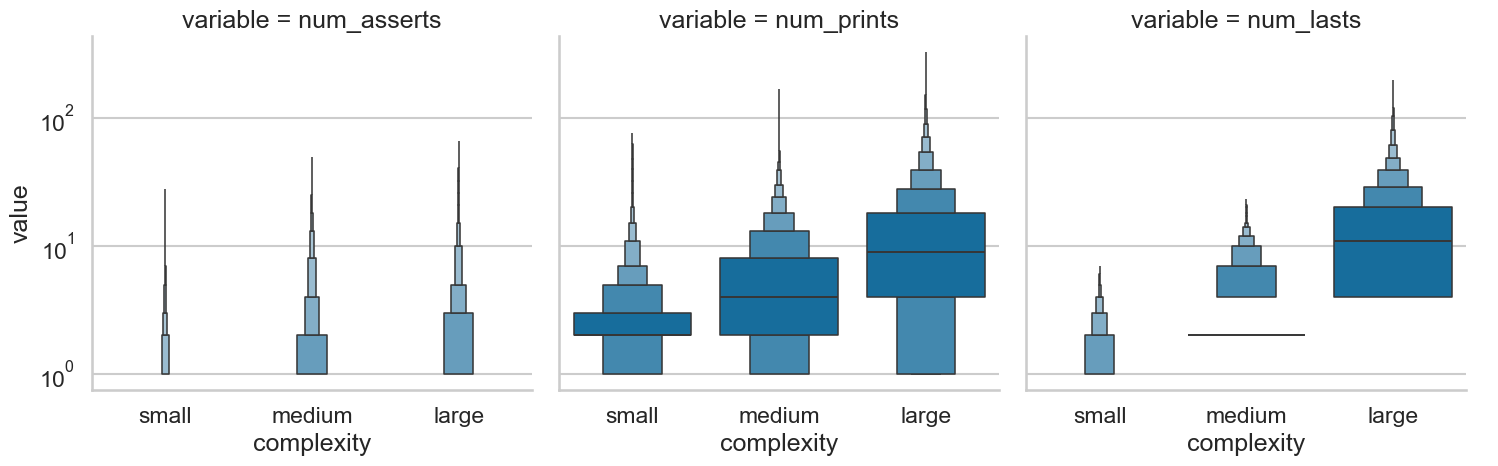

In [54]:
sns.catplot(
    data=melted,
    x="complexity",
    y="value",
    col="variable",
    kind="boxen",
    log_scale=True,
    order=["small", "medium", "large"]
)

- [ ] ensure that the data across the cols are normalized (we have more number of prints and lasts compared to asserts so we the thicker boxes in prints and lasts is expected)
- [ ] do we normalize per complexity as well?

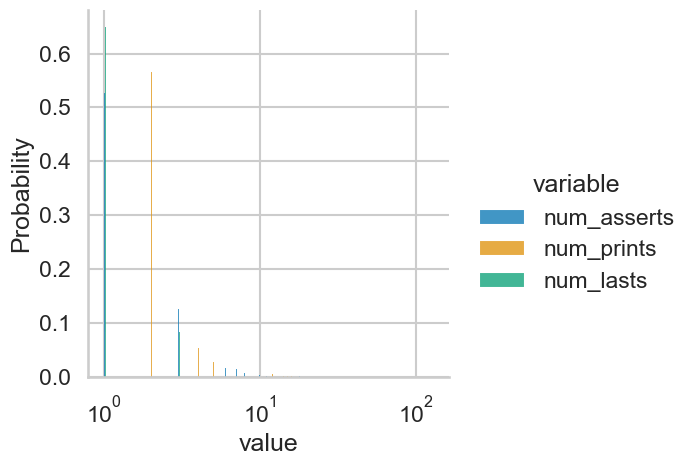

In [41]:
sns.displot(
    data=melted.loc[melted["complexity"] == "small"],
    # col="complexity",
    x="value",
    kind="hist",
    log_scale=True,
    hue="variable",
    stat="probability",
    common_norm=False,
    multiple="dodge"
)

# Analysis of assertions

## How many notebooks with vs. without at least one assertion?

In [117]:
asserts.drop_duplicates(subset=["notebook"]).shape

(25116, 2)

In [118]:
!grep '^INPUT' logs/data-collection.log |wc -l

297851


We analysed a total of 298K notebooks, 25K (8.5%) of which have at least one assertion.

## External testing method vs. built-in `assert`

In [119]:
class NodeCollector(ast.NodeVisitor):
    def __init__(self):
        self.node = None

    def visit_Assert(self, node: ast.Assert) -> None:
        self.node = node

    def visit_Call(self, node: ast.Call) -> None:
        self.node = node

def get_node(tree):
    collector = NodeCollector()
    collector.visit(tree)
    return collector.node

asserts.loc[:, "node"] = asserts.loc[:, "assert"].apply(lambda x: ast.parse(x))
asserts.loc[:, "node"] = asserts.loc[:, "node"].apply(get_node)
asserts

,notebook,assert,node
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_loss < 0.5, train_loss",<ast.Assert object at 0x170d89fd0>
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_acc <= 1 and train_acc > 0.7, tra...",<ast.Assert object at 0x170371ed0>
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert test_acc <= 1 and test_acc > 0.7, test_acc",<ast.Assert object at 0x17037f410>
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_loss < 0.5, train_loss",<ast.Assert object at 0x17037fc90>
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_acc <= 1 and train_acc > 0.7, tra...",<ast.Assert object at 0x170386710>
...,...,...,...
6,data/quaranta2021kgtorrent/KT_dataset/ashishpa...,assert shape[2] == 3,<ast.Assert object at 0x18aa63910>
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert type(self.targetName) == str,<ast.Assert object at 0x18aa63d90>
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert type(self.colnames) == str,<ast.Assert object at 0x18aa6c390>
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert self.colnames in X.columns,<ast.Assert object at 0x18aa6c8d0>


In [120]:
asserts.loc[asserts["node"].map(lambda x: not isinstance(x, ast.Assert))].shape

(4477, 3)

In [121]:
asserts.loc[asserts["node"].map(lambda x: isinstance(x, ast.Assert))].shape

(85129, 3)

We collected a total of 89.6K assertions from the 25K notebooks.

5% of the assertions are written using external testing methods, while majority of the assertions (95%) are written using the built-in `assert` statement.

## Do asserts have a failure message?

In [122]:
msgs = asserts.loc[asserts["node"].map(lambda x: isinstance(x, ast.Assert)), "node"]
msgs = msgs.apply(lambda x: x.msg).dropna()
msgs.shape

(28403,)

In [123]:
asserts = asserts.drop_duplicates(subset=["assert"])
asserts.shape

(27115, 3)

In [124]:
class FunctionNameCollector(ast.NodeVisitor):
    def __init__(self):
        self.names = []

    def visit_Name(self, node: ast.Name) -> None:
        self.names.append(node.id)

    def visit_Attribute(self, node: ast.Attribute) -> None:
        self.names.append(node.attr)

collector = FunctionNameCollector()
for _, node in asserts.loc[asserts["node"].map(lambda x: isinstance(x, ast.Call)), "node"].items():
    collector.visit(node.func)

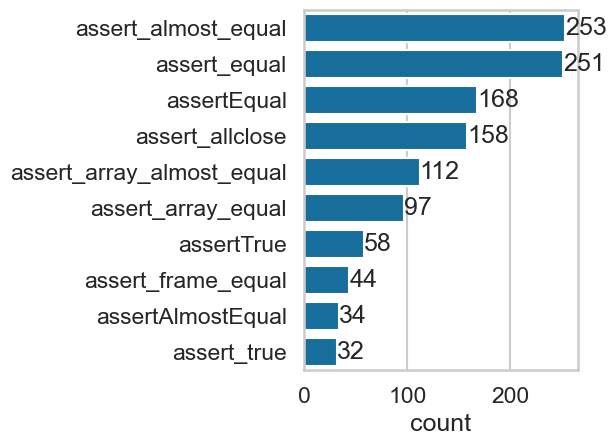

In [125]:
names = pd.Series(data=collector.names)
ax = sns.barplot(
    data=names.value_counts().sort_values(ascending=False).head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig('report/other-test-methods.pdf')

## Most common `Assert.test`?

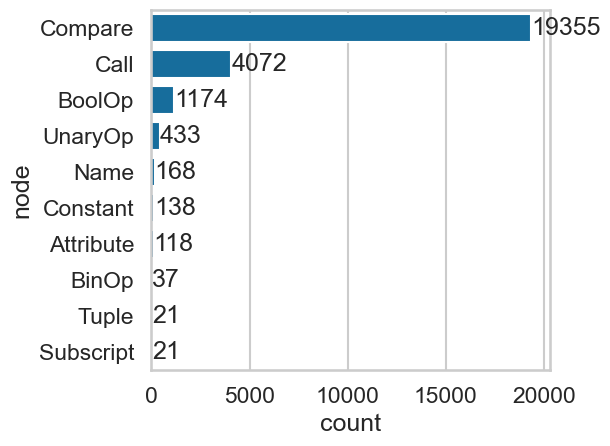

In [126]:
tests = asserts.loc[asserts["node"].map(lambda x: isinstance(x, ast.Assert)), "node"]
tests = tests.apply(lambda x: x.test)
ax = sns.barplot(
    data=tests.apply(lambda x: x.__class__.__name__)
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h",
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-assert-test.pdf")

## Most common `Compare.ops`?

In [127]:
compares = tests.loc[tests.map(lambda x: isinstance(x, ast.Compare))]
compares

32     <ast.Compare object at 0x1704ddad0>
6      <ast.Compare object at 0x170348c10>
6      <ast.Compare object at 0x170342050>
14     <ast.Compare object at 0x170340310>
100    <ast.Compare object at 0x1702dd110>
                      ...                 
42     <ast.Compare object at 0x18aa4ed50>
11     <ast.Compare object at 0x18aa57450>
19     <ast.Compare object at 0x18aa61c90>
19     <ast.Compare object at 0x18aa62590>
9      <ast.Compare object at 0x18aa62d50>
Name: node, Length: 19355, dtype: object

In [128]:
compares.sample(5).map(lambda x: ast.unparse(x))

54                               len(y_test.shape) == 1
17    processed_dict_genes['generic'][0] in dict_non...
52                len(set(batch['sampling_rate'])) == 1
6                               X_batch.shape == (2, 3)
4                                       0.1 <= v <= 1.9
Name: node, dtype: object

In [70]:
tests.loc[tests.map(lambda x: isinstance(x, ast.Call))].sample(5).map(lambda x: ast.unparse(x))

31                      isinstance(x, np.ndarray)
4                          AUX_DATA_ROOT.is_dir()
3     np.allclose(np.linalg.norm(wio, axis=0), 1)
42                      torch.all(xoriginal == x)
10      (rbf(x2, y2, sig=sig) == V2[0, 4]).item()
Name: node, dtype: object

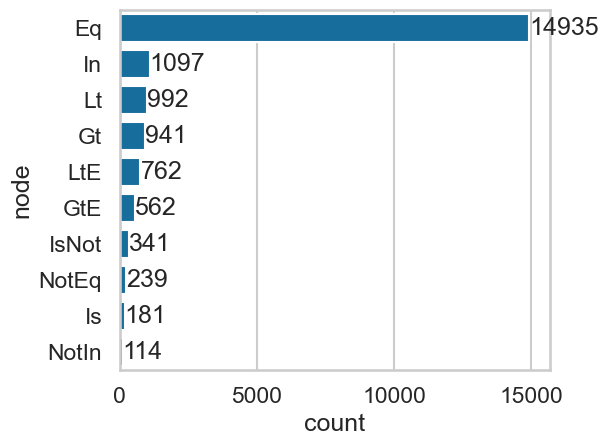

In [129]:
ops = compares.apply(lambda x: x.ops).explode()
ax = sns.barplot(
    data=ops.apply(lambda x: x.__class__.__name__)
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h",
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-compare-op.pdf")

## Top keywords in LHS vs. RHS?

TODO: merge LHS and RHS, analyse together (`x == 5` not different from `5 == x`)

In [130]:
lhs = compares.apply(lambda x: x.left)
lhs = lhs.apply(lambda x: ast.unparse(x))
lhs

32                                            train_loss
6                                                 stride
6                                        input_size % 32
14                                        gt_image.shape
100                                 key_rearranged.shape
                             ...                        
42                                       len(encounters)
11                               image_array_input.dtype
19                   mean_absolute_error(y_true, y_pred)
19     mean_absolute_error(y_true, y_pred, sample_wei...
9                                        X_test.shape[0]
Name: node, Length: 19355, dtype: object

In [131]:
vectorizer = CountVectorizer(
    stop_words=None,
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(lhs)
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

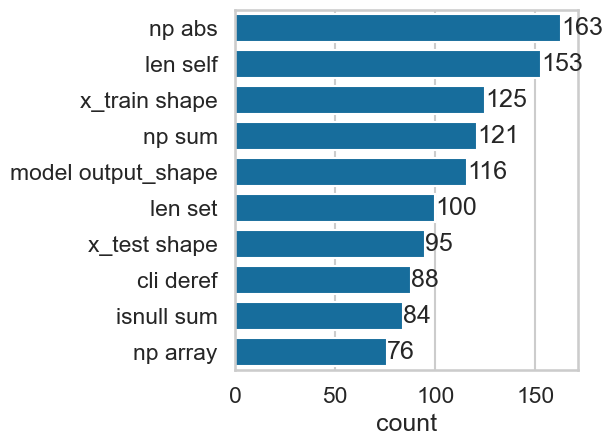

In [132]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-compare-lhs.pdf")

In [133]:
rhs = compares.apply(lambda x: x.comparators).explode()
rhs = rhs.apply(lambda x: ast.unparse(x))
rhs

32                       0.5
6                     [1, 2]
6                          0
14           pre_image.shape
100     key_transposed.shape
               ...          
42                 len(race)
11                  np.uint8
19                         2
19                   44 / 14
9      id_test.shape[0] // 3
Name: node, Length: 20164, dtype: object

In [134]:
vectorizer = CountVectorizer(
    stop_words=None,
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(rhs)
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

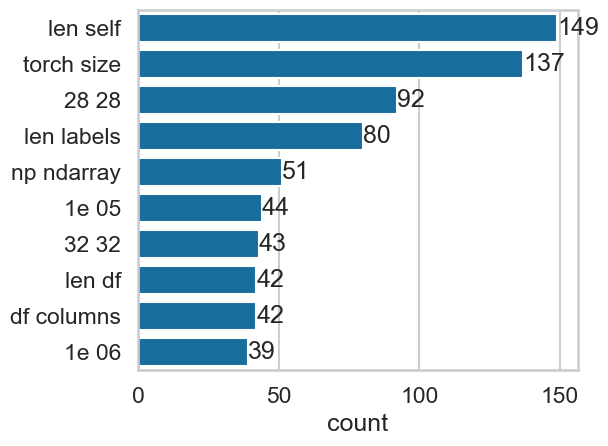

In [135]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-compare-rhs.pdf")

## What are the top keywords in the failure messages?

In [136]:
msgs = msgs.apply(lambda x: ast.unparse(x))
msgs = msgs.drop_duplicates()
msgs.shape

(5875,)

In [137]:
vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(msgs)
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

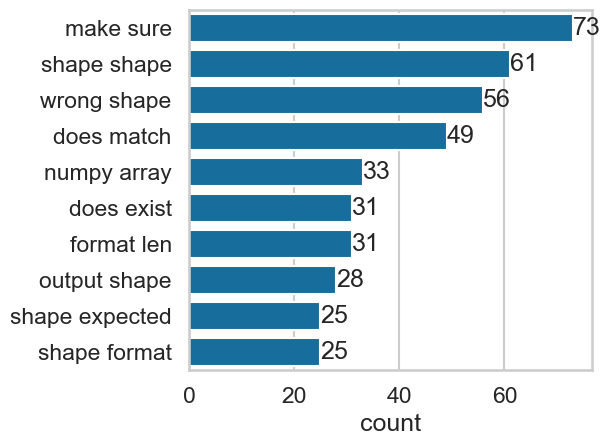

In [138]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-assert-msgs.pdf")

# Analysis of `print` statements

## How many notebooks with vs. without at least one print?

In [3]:
prints.drop_duplicates(subset=["notebook"]).shape

(180520, 2)

61% notebooks contain at least one print statement. Compared to assertions, print statements are considerable larger.

In [4]:
prints = prints.drop_duplicates(subset=["print"])
prints.shape

(498322, 2)

In [5]:
prints.loc[:, "node"] = prints.loc[:, "print"].map(lambda x: ast.parse(x))

/var/folders/3_/dh2k952n2rld3_w3r369mln80000gn/T/ipykernel_38887/2930081002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prints.loc[:, "node"] = prints.loc[:, "print"].map(lambda x: ast.parse(x))


## Top node inside print statements?

In [9]:
class ArgsCollector(ast.NodeVisitor):
    def __init__(self):
        self.args = None

    def visit_Call(self, node: ast.Call):
        if isinstance(node.func, ast.Name) and node.func.id == "print":
            self.args = node.args

def get_args(node):
    collector = ArgsCollector()
    collector.visit(node)
    return collector.args

args = prints.loc[:, "node"].map(get_args)
args = args.explode()
args = args.loc[args.notna()]
args

15     <ast.Constant object at 0x14a1b0d10>
15         <ast.Name object at 0x14a1b0cd0>
15     <ast.Constant object at 0x14a1b0c90>
15         <ast.Name object at 0x14a1b0c50>
15     <ast.Constant object at 0x14a1b0c10>
                      ...                  
59    <ast.Subscript object at 0x1b7dc1550>
5      <ast.Constant object at 0x1b7dc2010>
5          <ast.Call object at 0x1b7dc1f90>
5      <ast.Constant object at 0x1b7dc1d50>
5          <ast.Call object at 0x1b7dc1cd0>
Name: node, Length: 716088, dtype: object

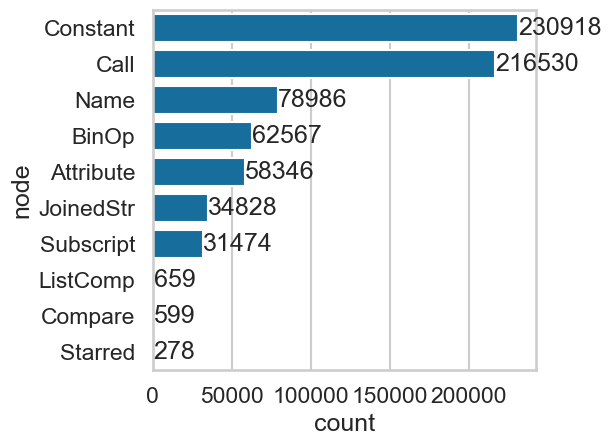

In [11]:
ax = sns.barplot(
    data=args.map(lambda x: x.__class__.__name__)
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-print-nodes.pdf")

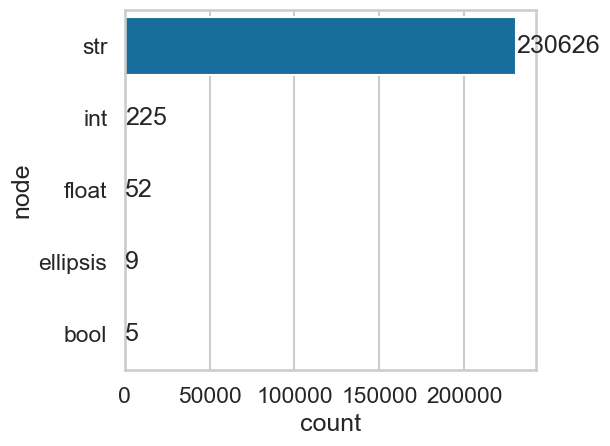

In [23]:
ax = sns.barplot(
    data=args.loc[args.map(lambda x: isinstance(x, ast.Constant))]
    .map(lambda x: x.value.__class__.__name__)
    .value_counts()
    .sort_values(ascending=False)
    .head(),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-print-constant-types.pdf")

## Top keywords in prints?

In [24]:
class ConstantCollector(ast.NodeVisitor):
    def __init__(self):
        self.constants = []

    def visit_Constant(self, node: ast.Constant):
        if isinstance(node.value, str):
            self.constants.append(node)

collector = ConstantCollector()
prints.loc[:, "node"].map(lambda x: collector.visit(x))

constants = pd.Series(data=collector.constants)
constants = constants.map(lambda x: ast.unparse(x))
constants

0              'Epoch: '
1             '| Step: '
2               '|loss:'
3                '|acc:'
4         '  |val_loss:'
               ...      
512714             'Age'
512715        'Embarked'
512716           'Cabin'
512717         'train: '
512718       '\n test: '
Length: 512719, dtype: object

In [25]:
constants.shape

(512719,)

In [26]:
vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(constants.sample(44568)) # 99.999% CL, 1% error
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

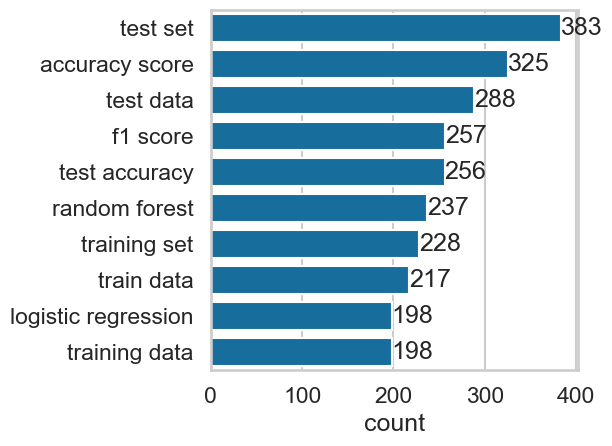

In [27]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-print-constants.pdf")

In [54]:
class ConstantRemover(ast.NodeTransformer):
    def visit_Constant(self, node: ast.Constant):
        if isinstance(node, str):
            return ""

In [57]:
def unparse(node):
    try:
        new = ast.unparse(node)
    except AttributeError:
        new = None
    finally:
        return new

transformer = ConstantRemover()
code = prints.loc[:, "node"].map(lambda x: ast.fix_missing_locations(transformer.visit(x)))
code = code.map(unparse)
code = code.loc[code.notna()]
code

15    print(epoch, step, train_loss.item(), acc)
15                 print(train_loss.item(), acc)
15                                       print()
2                        print(f'{label.shape}')
6                                        print()
                         ...                    
34                         print(f'{score:}{n}')
34                         print(f'{score:}{n}')
35                         print(f'{score:}{n}')
35                         print(f'{score:}{n}')
5                   print(len(train), len(test))
Name: node, Length: 366856, dtype: object

In [58]:
vectorizer = CountVectorizer(
    stop_words=["print"],
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(code.sample(43103)) # 99.999% CL, 1% error
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

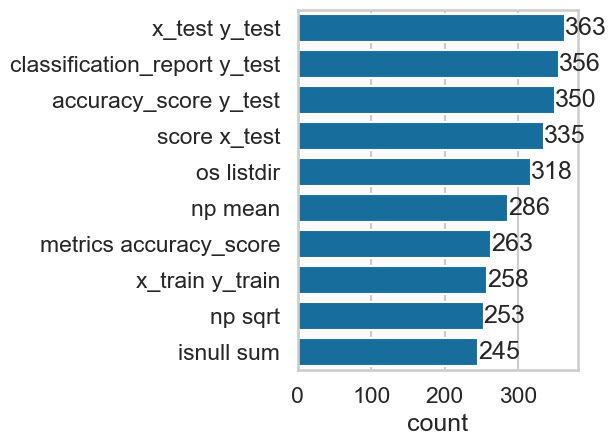

In [60]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-print-not-constants.pdf")

# Analysis of Last statements

## How many notebooks with vs. without at least one last statement?

In [78]:
lasts.drop_duplicates(subset=["notebook"]).shape

(119106, 2)

40% notebooks contain at least one last statement.

In [101]:
lasts = lasts.drop_duplicates(subset=["last"])
lasts = lasts.loc[lasts["last"].notna()]
lasts.shape

(373606, 2)

In [102]:
lasts.loc[:, "node"] = lasts.loc[:, "last"].map(lambda x: ast.parse(x))

## Most common nodes in last statements?

In [105]:
class NodeCollector(ast.NodeVisitor):
    def __init__(self):
        self.nodes = []

    def visit_Expr(self, node: ast.Expr):
        self.nodes.append(node.value)

collector = NodeCollector()
lasts.loc[:, "node"].map(lambda x: collector.visit(x))
nodes = pd.Series(data=collector.nodes)

In [106]:
nodes.shape

(373506,)

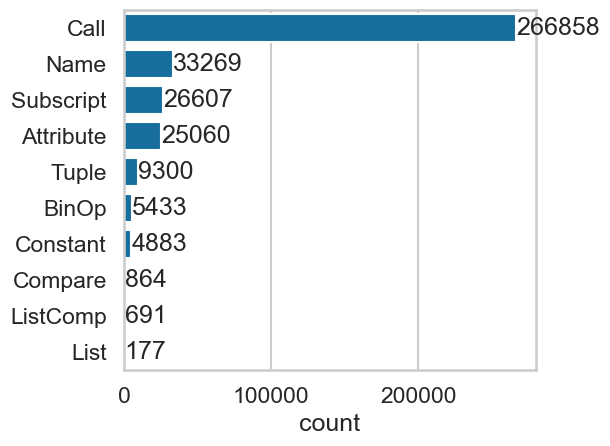

In [143]:
ax = sns.barplot(
    nodes.map(lambda x: x.__class__.__name__)
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient='h'
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-nodes.pdf")

## Most common modules used in last statements?

In [135]:
class NameCollector(ast.NodeVisitor):
    def __init__(self):
        self.name = None
        self.stack = []

    def visit_Name(self, node: ast.Name):
        if self.stack:
            self.name = (node.id, self.stack[0].attr)
        else:
            self.name = (None, node.id)

    def visit_Attribute(self, node: ast.Attribute):
        self.stack.append(node)
        self.visit(node.value)
    
    def visit_Call(self, node: ast.Call):
        self.visit(node.func)

def get_names(node):
    collector = NameCollector()
    collector.visit(node)
    return collector.name

names = pd.DataFrame(data=nodes.map(get_names).tolist(), columns=["module", "function"])
names.shape


(373506, 2)

In [136]:
names.value_counts()

module    function 
sns       countplot    7415
plt       title        6024
sns       heatmap      5518
          boxplot      4697
          distplot     4625
                       ... 
df_val    DecodeIds       1
df_vaild  head            1
df_vader  head            1
          describe        1
λ         max             1
Name: count, Length: 101283, dtype: int64

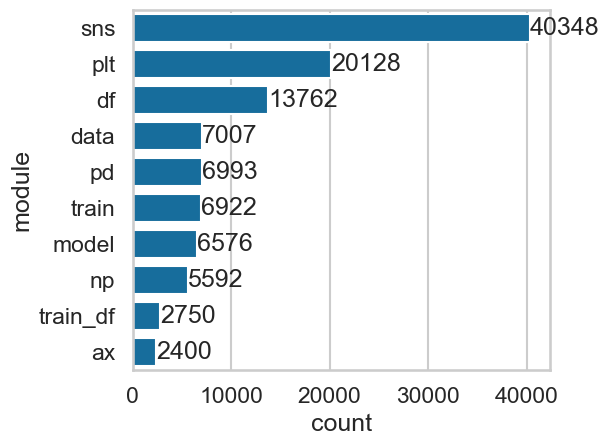

In [144]:
ax = sns.barplot(
    data=names["module"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-modules.pdf")

## Most common functions used in last statements?

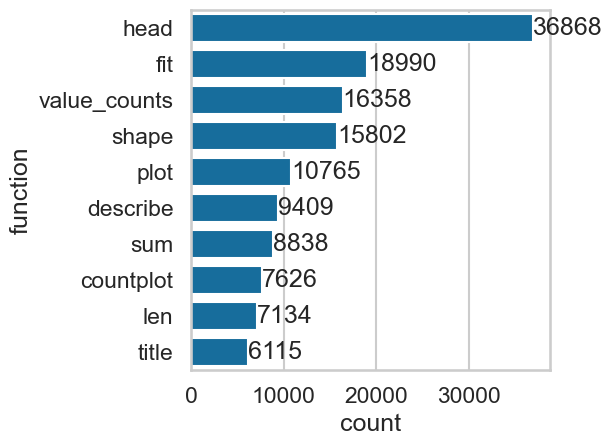

In [145]:
ax = sns.barplot(
    data=names["function"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-functions.pdf")

## Most common function called on data frames?

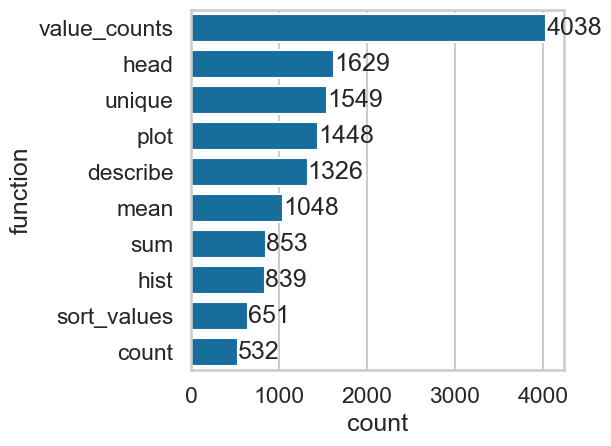

In [146]:
ax = sns.barplot(
    data=names.loc[names["module"].map(lambda x: x in ["data", "df"])].loc[:, "function"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-df-functions.pdf")

## Most common visualisations used?

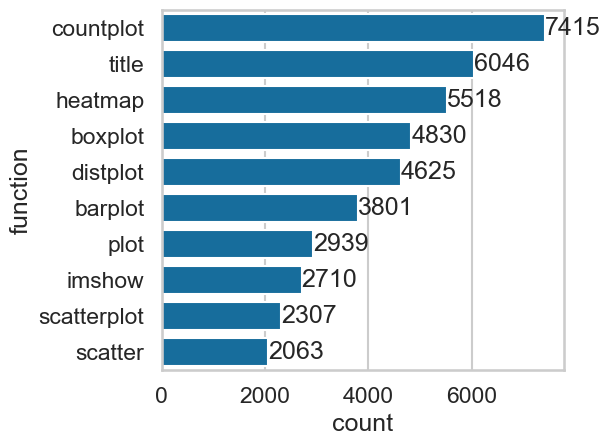

In [147]:
ax = sns.barplot(
    data=names.loc[names["module"].map(lambda x: x in ["sns", "plt"])].loc[:, "function"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-visualisation-functions.pdf")

## Top keywords in last statements?

In [148]:
vectorizer = CountVectorizer(
    stop_words=None,
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(nodes.sample(43195).map(lambda x: ast.unparse(x)))
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

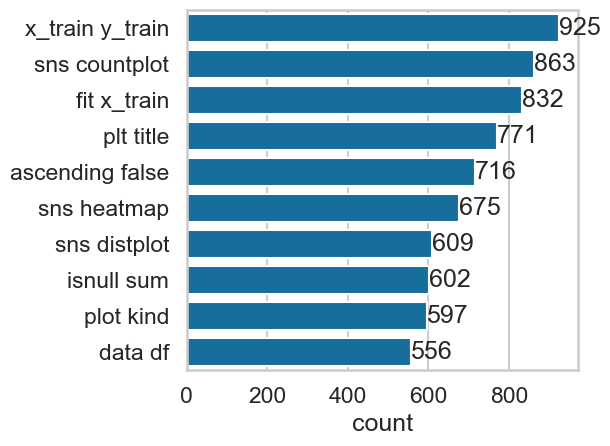

In [149]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-keywords.pdf")

# Case Study Data Preparation

In [55]:
vectorizer = TfidfVectorizer(
    stop_words=["assert"],
)
X = vectorizer.fit_transform(asserts["assert"])
occurances = pd.DataFrame(
    data={"freq": X.toarray().max(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
occurances = occurances.sort_values(by=["freq"], ascending=False)

In [57]:
occurances.head(10)

,freq
max_erasures_per_image,1.0
20,1.0
kernelsize,1.0
_f,1.0
success_sbb,1.0
537,1.0
success_thr,1.0
mapsize,1.0
best_a,1.0
objects,1.0


In [58]:
occurances.describe()

,freq
count,24249.000000
mean,0.610096
std,0.200406
min,0.022622
25%,0.461294
50%,0.620025
75%,0.739711
max,1.000000


In [59]:
asserts.loc[:, "tokens"] = asserts.loc[:, "assert"].apply(vectorizer.build_analyzer())
asserts.loc[:, "sum_freq"] = X.toarray().sum(axis=1) # sum all columns to get TF-IDF of all tokens in each asser
asserts.loc[:, "max_freq"] = X.toarray().max(axis=1) # luis: take max TF-IDF of all tokens in assert
asserts = asserts.loc[asserts["tokens"].map(lambda x: True if x else False)] # remove asserts without any tokens

In [60]:
asserts.sort_values(by=["sum_freq"], ascending=False)

,notebook,assert,tokens,sum_freq,max_freq
12,data/assert_notebooks/hwhv66/CourseworkDurham/...,"assert np.isclose(forwardPass(xin, w), np.arra...","[np, isclose, forwardpass, xin, np, array, 825...",8.643963,0.117374
24,data/quaranta2021kgtorrent/KT_dataset/rox1234_...,"assert sorted(bow)[::200] == ['!', '12500', '2...","[sorted, bow, 200, 12500, 270, 700, by, gh, mi...",7.116177,0.143051
26,data/quaranta2021kgtorrent/KT_dataset/alishera...,"assert sorted(bow_vocabulary)[::200] == ['!', ...","[sorted, bow_vocabulary, 200, 12500, 270, 700,...",7.112420,0.143492
20,data/quaranta2021kgtorrent/KT_dataset/nikolayc...,"assert sorted(bow_vocabulary)[::200] == ['!', ...","[sorted, bow_vocabulary, 200, 12500, 270, 700,...",7.112420,0.143492
23,data/quaranta2021kgtorrent/KT_dataset/vladisla...,"assert sorted(bow_vocabulary)[::200] == ['!', ...","[sorted, bow_vocabulary, 200, 12500, 270, 700,...",7.112420,0.143492
...,...,...,...,...,...
12,data/assert_notebooks/anoff/aind-rnn/RNN_proje...,"assert X.shape == (5, 2)",[shape],1.000000,1.000000
53,data/assert_notebooks/annekroon/CCS-2/week04/e...,assert month == i[0] == e[0],[month],1.000000,1.000000
18,data/assert_notebooks/annekroon/CCS-2/week04/e...,assert month == i[0] == e[0],[month],1.000000,1.000000
1,data/assert_notebooks/BlueVelvetSackOfGoldPota...,assert kernel_size % 2,[kernel_size],1.000000,1.000000


In [62]:
asserts.loc[:, "bin"] = pd.qcut(asserts.loc[:, "sum_freq"], 4, labels=False)
asserts["bin"].value_counts()

/var/folders/72/dkwg1j016fqf0st2qg2_56740000gn/T/ipykernel_40133/2946786132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asserts.loc[:, "bin"] = pd.qcut(asserts.loc[:, "sum_freq"], 4, labels=False)


bin
2    22292
0    22266
1    22265
3    22239
Name: count, dtype: int64

In [64]:
asserts = asserts.merge(
    stats.loc[:, ["notebook", "complexity"]], on="notebook", how="left"
)
asserts

,notebook,assert,tokens,sum_freq,max_freq,bin,complexity
0,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_loss < 0.5, train_loss","[train_loss, train_loss]",1.000000,1.000000,0,medium
1,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_acc <= 1 and train_acc > 0.7, tra...","[train_acc, and, train_acc, train_acc]",1.144201,0.987674,0,medium
2,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert test_acc <= 1 and test_acc > 0.7, test_acc","[test_acc, and, test_acc, test_acc]",1.150186,0.986515,0,medium
3,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_loss < 0.5, train_loss","[train_loss, train_loss]",1.000000,1.000000,0,medium
4,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_acc <= 1 and train_acc > 0.7, tra...","[train_acc, and, train_acc, train_acc]",1.144201,0.987674,0,medium
...,...,...,...,...,...,...,...
89057,data/quaranta2021kgtorrent/KT_dataset/ashishpa...,assert shape[2] == 3,[shape],1.000000,1.000000,0,medium
89058,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert type(self.targetName) == str,"[type, self, targetname, str]",1.871581,0.766481,1,large
89059,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert type(self.colnames) == str,"[type, self, colnames, str]",1.871581,0.766481,1,large
89060,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert self.colnames in X.columns,"[self, colnames, in, columns]",1.851540,0.774045,1,large


<Axes: xlabel='bin', ylabel='Density'>

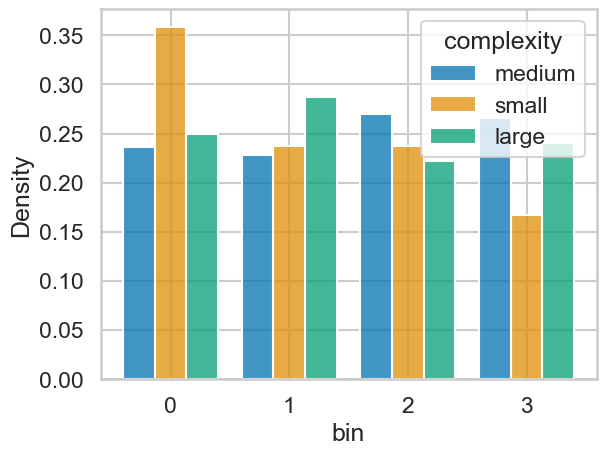

In [81]:
sns.histplot(
    data=asserts,
    x="bin",
    hue="complexity",
    stat="density",
    common_norm=False,
    multiple="dodge",
    discrete=True,
    shrink=0.8,
)

In [140]:
for idx in asserts["bin"].unique():
    asserts.loc[asserts["bin"] == idx].sample(100, random_state=42).to_csv(f"data/shome2023notebook/quartile-{idx}.csv")

# Outputs

In [32]:
github = pd.read_csv(
    "data/shome2023notebook/kaggle-outputs.csv",
    header=None,
    names=["notebook", "source", "output_type", "text", "has_image", "has_html"],
    usecols=lambda x: x in ["notebook", "output_type"],
)
github

KeyboardInterrupt: 

# Print outputs

In [3]:
prints = pd.read_csv(
    "data/shome2023notebook/output-prints.csv",
    index_col=0,
)
prints

,notebook,print,text,source
38,data/assert_notebooks/declanvk/data301-project...,"print(accuracy_score(ytest, gaussian_ypredict))",0.742537313433\n,"print(accuracy_score(ytest, gaussian_ypredict))"
43,data/assert_notebooks/declanvk/data301-project...,"print(accuracy_score(ytest, youtput))",0.817164179104\n,youtput = rforest_model.predict(Xtest)\n\nprin...
47,data/assert_notebooks/declanvk/data301-project...,"print(val_scores.mean(), val_scores.std())",0.82386618999 0.0445362753371\n,"print(val_scores.mean(), val_scores.std())"
2,data/assert_notebooks/0lidaxiang/dp-predict-st...,"print('Rows of dataset=%d, training set rows=%...","Rows of dataset=946, training set rows=757, te...",# Read pickle and split training and testing s...
5,data/assert_notebooks/0lidaxiang/dp-predict-st...,"print(X_train.shape, Y_train.shape)","(757, 20) (757,)\n",# Create training inputs\n# print(type(train_d...
...,...,...,...,...
16,data/quaranta2021kgtorrent/KT_dataset/vladzern...,print(any(data_test['Fare'].isnull())),False\nFalse\nTrue\nFalse\nFalse\nTrue\nFalse\n,print(any(data_test['Pclass'].isnull()))\nprin...
16,data/quaranta2021kgtorrent/KT_dataset/vladzern...,print(any(data_test['Embarked'].isnull())),False\nFalse\nTrue\nFalse\nFalse\nTrue\nFalse\n,print(any(data_test['Pclass'].isnull()))\nprin...
20,data/quaranta2021kgtorrent/KT_dataset/vladzern...,"print(metrics.classification_report(ypred, yte...",precision recall f1-score ...,ypred = model.predict(Xtest)\nfrom sklearn imp...
30,data/quaranta2021kgtorrent/KT_dataset/gauravdu...,print(text_representation),|--- feature_0 <= 54.50\n| |--- feature_1 <=...,\nfrom sklearn import tree\ntext_representatio...


In [4]:
vectorizer = CountVectorizer(
    stop_words=["print"],
)
X = vectorizer.fit_transform(prints["print"])
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

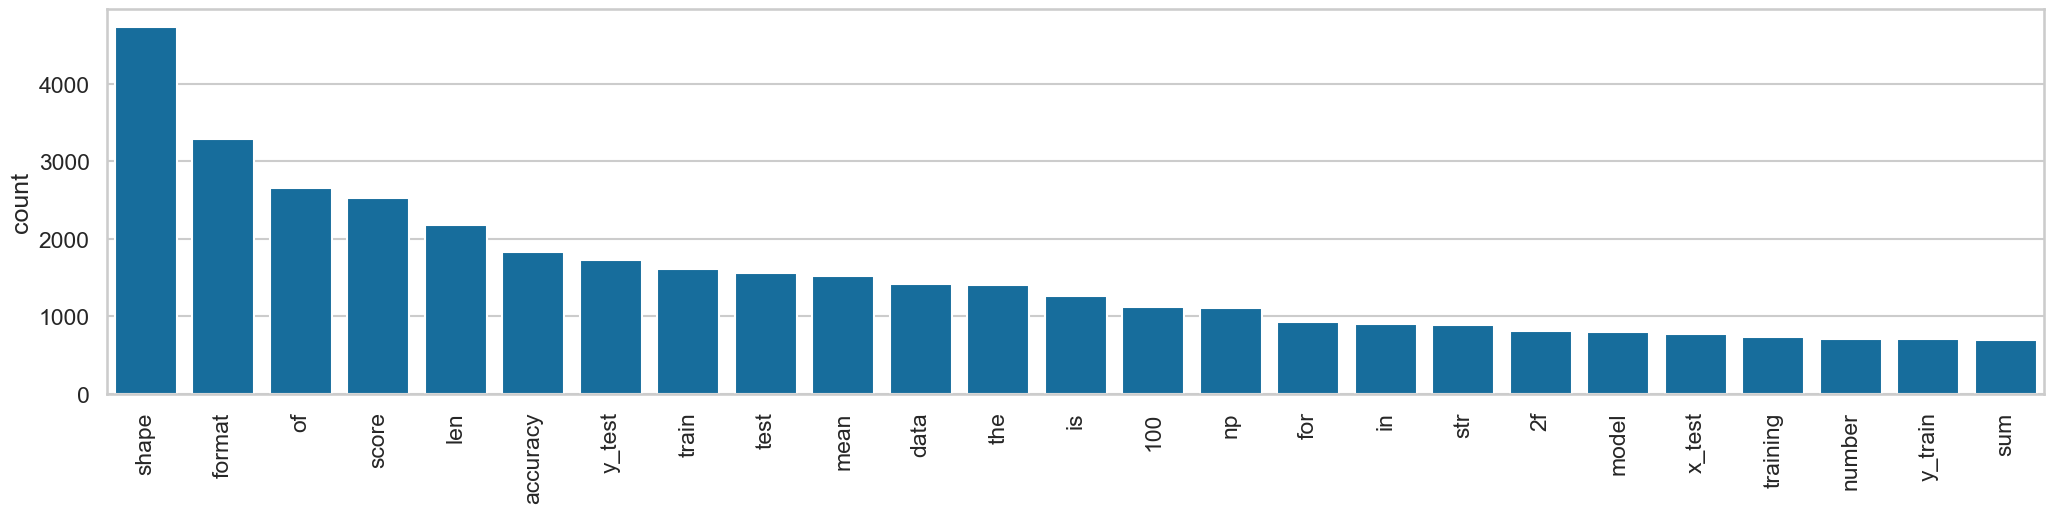

In [5]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(
    data=counts["count"].head(25),
    ax=ax,
)
ax.tick_params(axis='x', rotation=90)

In [6]:
vectorizer = TfidfVectorizer(
    stop_words=["print"],
)
X = vectorizer.fit_transform(prints["print"])
occurances = pd.DataFrame(
    data={"freq": X.toarray().max(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
occurances = occurances.sort_values(by=["freq"], ascending=False)

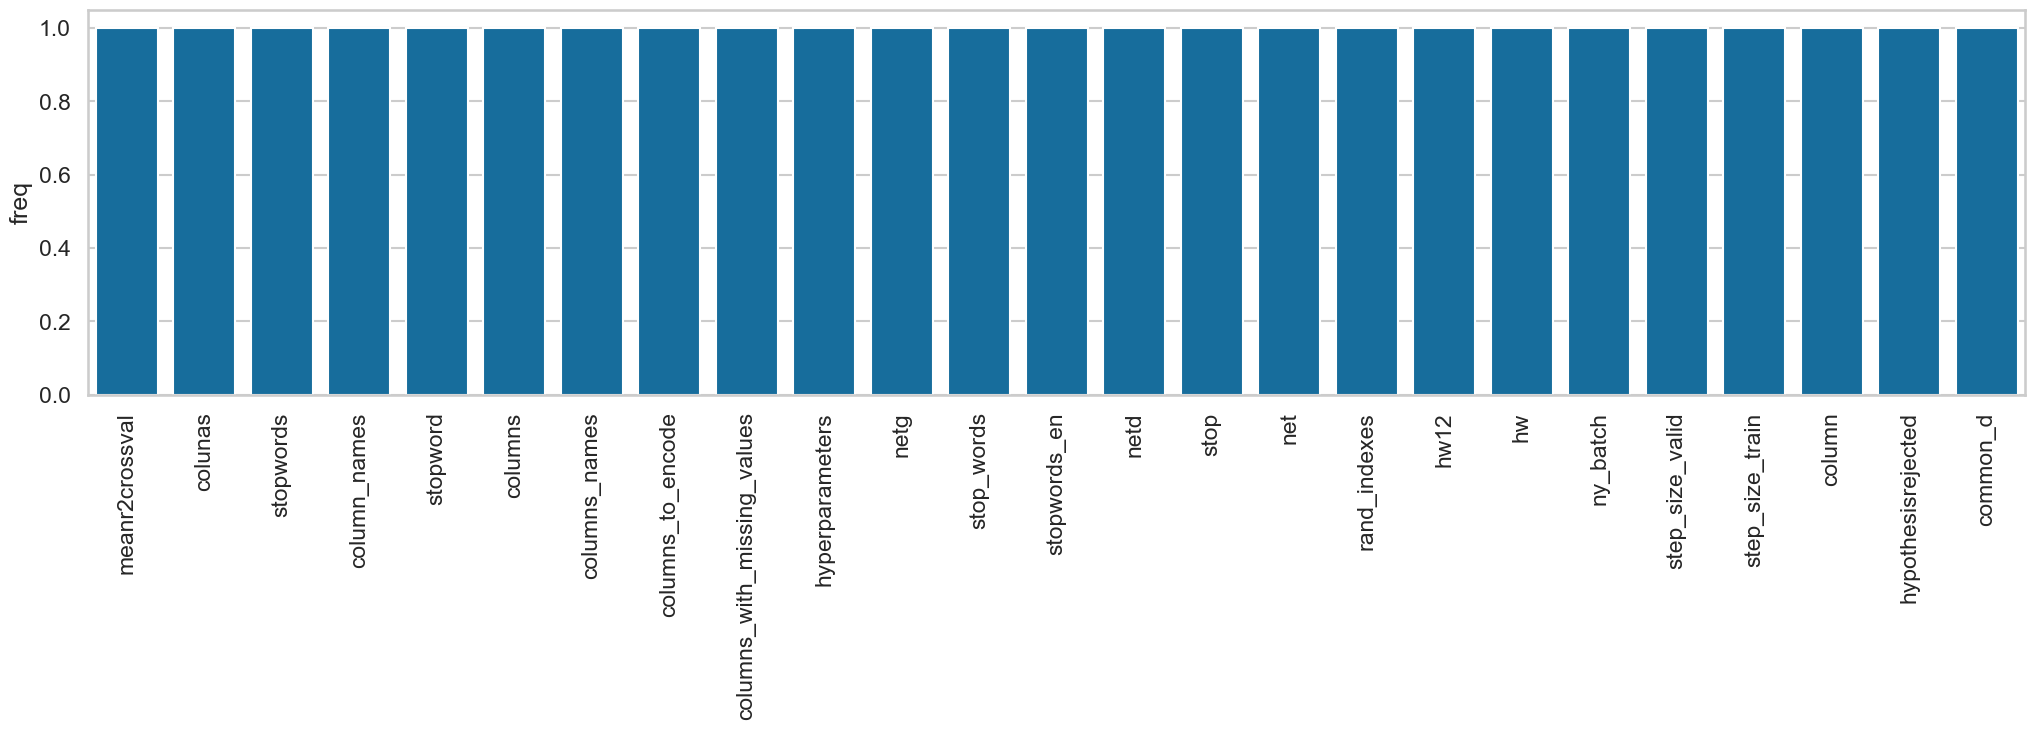

In [7]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(
    data=occurances["freq"].head(25),
    ax=ax,
)
ax.tick_params(axis='x', rotation=90)

In [8]:
prints.loc[:, "tokens"] = prints.loc[:, "print"].apply(vectorizer.build_analyzer())
prints.loc[:, "sum_freq"] = X.toarray().sum(axis=1) # sum all columns to get TF-IDF of all tokens in each asser
prints.loc[:, "max_freq"] = X.toarray().max(axis=1) # luis: take max TF-IDF of all tokens in assert
prints = prints.loc[prints["tokens"].map(lambda x: True if x else False)] # remove asserts without any tokens

In [10]:
prints.loc[:, "bin"] = pd.qcut(prints["sum_freq"], 4, labels=False)
prints["bin"].value_counts()

/var/folders/3_/dh2k952n2rld3_w3r369mln80000gn/T/ipykernel_36562/2468383750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prints.loc[:, "bin"] = pd.qcut(prints["sum_freq"], 4, labels=False)


bin
0    6254
3    6254
1    6253
2    6253
Name: count, dtype: int64

In [11]:
for idx in prints["bin"].unique():
    prints.loc[prints["bin"] == idx].sample(100, random_state=42).to_csv(f"data/shome2023notebook/prints-quartile-{idx}.csv")

In [6]:
import pandas as pd
files = !find data/shome2023notebook -type f -name 'prints-quartile-*.csv' -or -name 'texts-quartile-*.csv'
frames = []
for file in files:
    frames.append(pd.read_csv(file, index_col=0, usecols=["notebook"]))
notebooks = pd.concat(frames)
notebooks.to_csv("data/shome2023notebook/output-notebooks.txt", sep="\t", header=None)

# Text outputs

In [19]:
texts = pd.read_csv(
    "data/shome2023notebook/output-texts.csv",
    index_col=0,
).dropna()
texts

,notebook,last_node,text,source
6,data/assert_notebooks/declanvk/data301-project...,raw_data.head(),survived pclass sex age sibsp parc...,raw_data.head()
21,data/assert_notebooks/declanvk/data301-project...,X.head(),pclass age sibsp parch fare alone ...,X.head()
41,data/assert_notebooks/declanvk/data301-project...,"rforest_model.fit(Xtrain, ytrain)","RandomForestClassifier(bootstrap=True, class_w...",from sklearn.ensemble import RandomForestClass...
49,data/assert_notebooks/declanvk/data301-project...,plt.ylabel('predicted label'),<matplotlib.figure.Figure at 0x7f4cae8878d0>,from sklearn.metrics import confusion_matrix\n...
51,data/assert_notebooks/declanvk/data301-project...,"feature_importance.sort_values('importance', a...",feature importance\n7 male ...,feature_importance = pd.DataFrame({'feature': ...
...,...,...,...,...
38,data/quaranta2021kgtorrent/KT_dataset/gauravdu...,"confusion_matrix(y_train, y_train_pred)","array([[69, 18],\n [26, 49]])","print(accuracy_score(y_train, y_train_pred))\n..."
23,data/quaranta2021kgtorrent/KT_dataset/nataliam...,"c_w_train = dict(zip(range(4), c_w))",<Figure size 576x576 with 1 Axes>,c_w = get_class_weights(y_train)\nplot_class_w...
24,data/quaranta2021kgtorrent/KT_dataset/nataliam...,"plot_class_weights(get_class_weights(y_val), t...",<Figure size 576x576 with 1 Axes>,"plot_class_weights(get_class_weights(y_val),ti..."
31,data/quaranta2021kgtorrent/KT_dataset/nataliam...,vizualize_history(hist),<Figure size 576x576 with 1 Axes>,vizualize_history(hist)


In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts["last_node"])
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

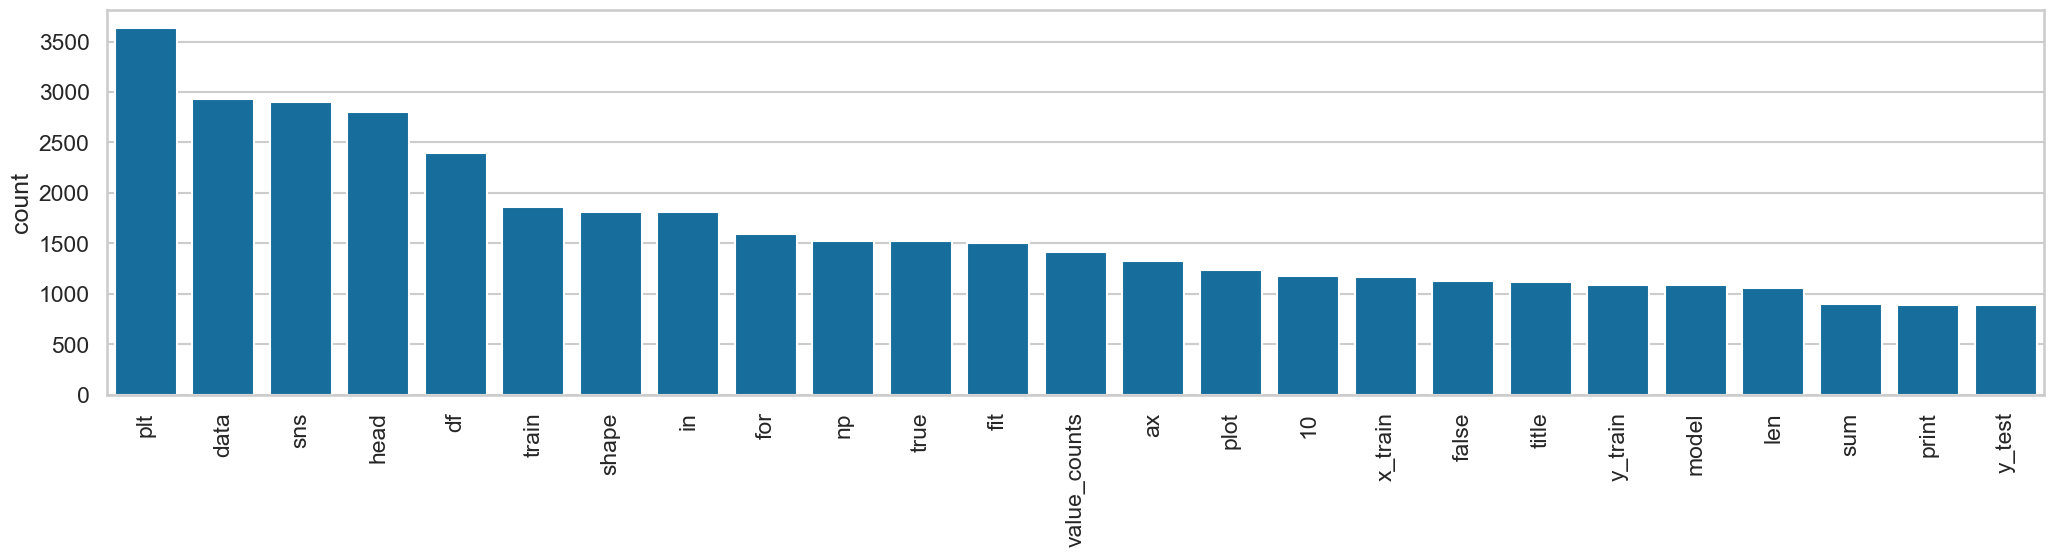

In [22]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(
    data=counts["count"].head(25),
    ax=ax,
)
ax.tick_params(axis='x', rotation=90)

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts["last_node"])
occurances = pd.DataFrame(
    data={"freq": X.toarray().max(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
occurances = occurances.sort_values(by=["freq"], ascending=False)

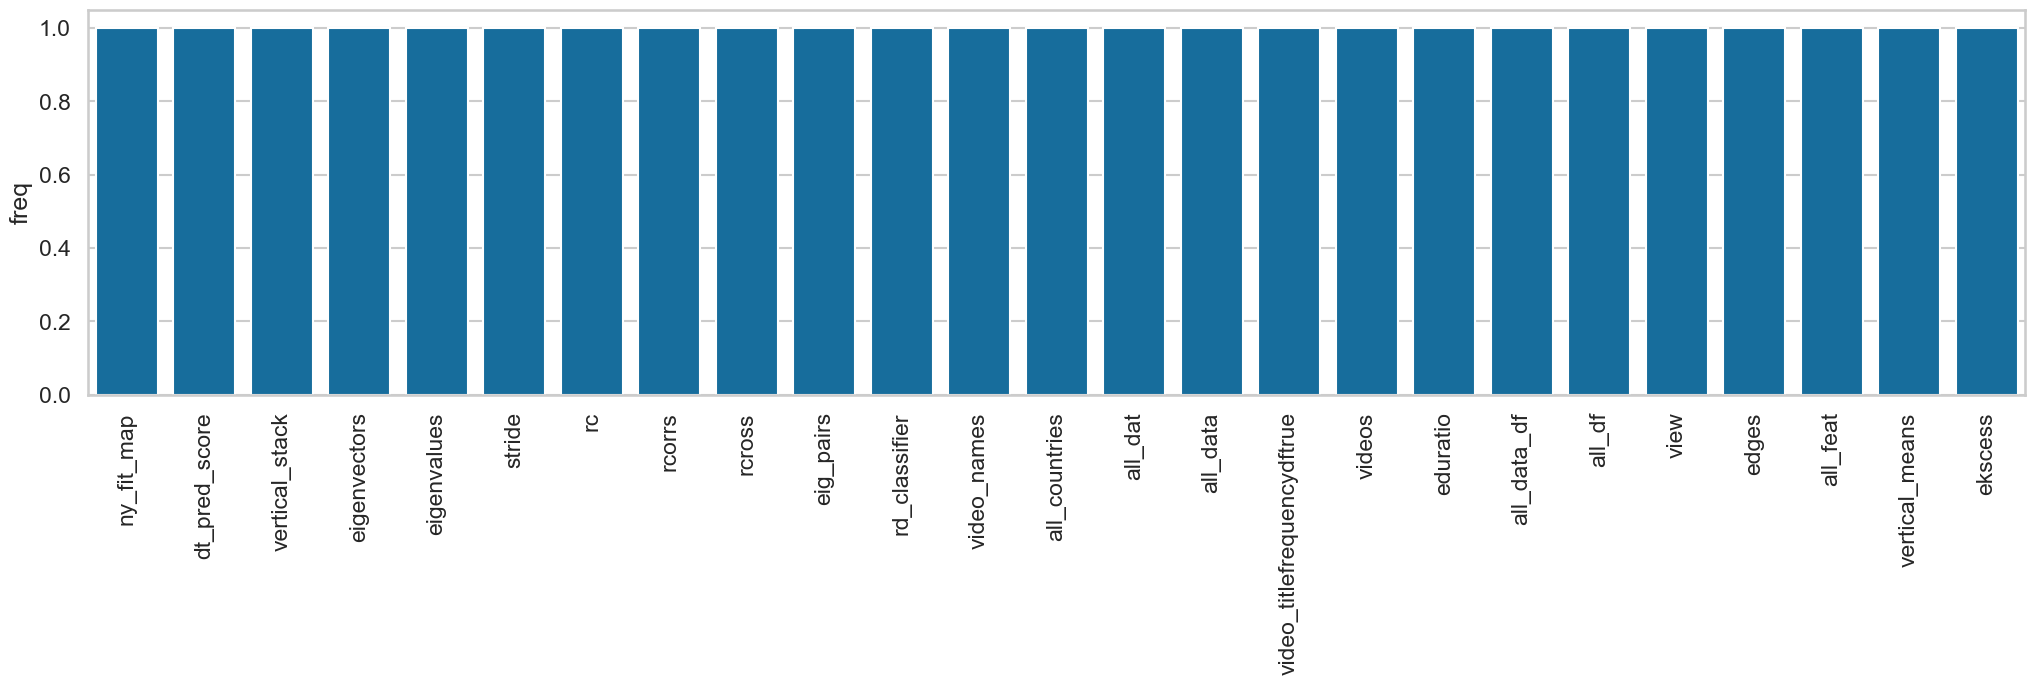

In [24]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(
    data=occurances["freq"].head(25),
    ax=ax,
)
ax.tick_params(axis='x', rotation=90)

In [26]:
texts.loc[:, "tokens"] = texts.loc[:, "last_node"].apply(vectorizer.build_analyzer())
texts.loc[:, "sum_freq"] = X.toarray().sum(axis=1) # sum all columns to get TF-IDF of all tokens in each asser
texts.loc[:, "max_freq"] = X.toarray().max(axis=1) # luis: take max TF-IDF of all tokens in assert
texts = texts.loc[texts["tokens"].map(lambda x: True if x else False)] # remove asserts without any tokens

In [27]:
texts.loc[:, "bin"] = pd.qcut(texts["sum_freq"], 4, labels=False)
texts["bin"].value_counts()

/var/folders/3_/dh2k952n2rld3_w3r369mln80000gn/T/ipykernel_36562/3414631874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts.loc[:, "bin"] = pd.qcut(texts["sum_freq"], 4, labels=False)


bin
0    7112
3    7109
2    7108
1    7106
Name: count, dtype: int64

In [28]:
for idx in texts["bin"].unique():
    texts.loc[texts["bin"] == idx].sample(100, random_state=42).to_csv(f"data/shome2023notebook/texts-quartile-{idx}.csv")